# AMATH 515 Homework 1

**Due Date: 01/23/2019**

* Name: Alexey Sholokhov
* Student Number: 1822506

*Homework Instruction*: Please follow order of this notebook and fill in the codes where commented as `TODO`.

In [37]:
# require numpy module
import numpy as np
import scipy as sp
from scipy.special import expit
from numpy.linalg import norm
from numpy.linalg import solve
import matplotlib.pyplot as plt

In [4]:
# import the supplementary function for homework 1
import sys
sys.path.insert(0, './')
from hw1_supp import *

## Gradient Descent Solver

Recall the gradient descent algorithm we learned from the class and complete the gradient descent solver.

In [5]:
def optimizeWithGD(x0, func, grad, step_size, tol=1e-6, max_iter=1000, use_line_search=False):
    """
    Optimize with Gradient Descent
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Input x and return the function value.
    grad : function
        Input x and return the gradient.
    step_size : float or None
        If it is a float number and `use_line_search=False`, it will be used as the step size.
        Otherwise, line search will be used
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
    use_line_search : bool, optional
        When it is true a line search will be used, other wise `step_size` has to be provided.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, line search fail
        3, others
    """
    # safeguard
    if not use_line_search and step_size is None:
        print('Please specify the step_size or use the line search.')
        return x0, np.array([]), np.array([]), 3
    
    # initial step
    x = np.copy(x0)
    g = grad(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iterations
    iter_count = 0
    while err >= tol:
        if use_line_search:
            step_size = lineSearch(x, g, g, func)
        #
        # if line search fail step_size will be None
        if step_size is None:
            print('Gradient descent line search fail.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 2
        #
        # gradient descent step
        #####
        # TODO: with given step_size, complete gradient descent step
        x = x - step_size*g 
        #####
        #
        # update function and gradient
        g = grad(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('Gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

## Newton's Solver

Recall the Newton's method we learned from the class and complete the Newton's solver.

*Remark*: This is a simplified version of Newton's method which do not evolve line search with constant step size 1.

In [79]:
def optimizeWithNT(x0, func, grad, hess, tol=1e-6, max_iter=100):
    """
    Optimize with Newton's Method
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Input x and return the function value.
    grad : function
        Input x and return the gradient.
    hess : function
        Input x and return the Hessian matrix.
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial step
    x = np.copy(x0)
    g = grad(x)
    H = hess(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iteration
    iter_count = 0
    while err >= tol:
        # Newton's step
        #####
        # TODO: complete Newton's step
        x = x - solve(H, g)
        #####
        #
        # update function, gradient and Hessian
        g = grad(x)
        H = hess(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('Gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

## Simple Test

Consider a simple test problem,

$$
\min_x~~f(x) \triangleq \frac{1}{2} \|x - b\|^2
$$

We could easily calculate the gradient and Hessian of $f$,

$$
\nabla f(x) = x - b, \quad \nabla^2 f(x) = I
$$

where $I$ is the identity matrix, and we know that $x^* = b$ is the solution.

Please complete the solvers above, use the following function as a simple test.

*Remark*: Having simple test is always a good idea. It can easily detect the bugs in the code and save a lot of time and emotion energy when use the code in the more complex context.

In [7]:
# create b
b = np.array([1.0, 2.0, 3.0])
# define test function
def test_func(x):
    return 0.5*sum((x - b)**2)
# define test gradient
def test_grad(x):
    return x - b
# define test Hessian
def test_hess(x):
    return np.eye(b.size)

In [8]:
# test gradient descent
x0_gd = np.zeros(b.size)
#
x_gd, obj_his_gd, err_his_gd, exit_flag_gd = optimizeWithGD(x0_gd, test_func, test_grad, 1.0)
# check if solution is correct
err_gd = norm(x_gd - b)
#
if err_gd < 1e-6:
    print('Gradient Descent: OK')
else:
    print('Gradient Descent: Err')

Gradient Descent: OK


In [11]:
# test Newton's method
x0_nt = np.zeros(b.size)
#
x_nt, obj_his_nt, err_his_nt, exit_flag_nt = optimizeWithNT(x0_nt, test_func, test_grad, test_hess)
# check if solution is correct
err_nt = norm(x_nt - b)
#
if err_nt < 1e-6:
    print('Newton: OK')
else:
    print('Newont: Err')

Newton: OK


## Logistic Regression

Recall the logistic regression model from the class,
$$
f(x) = \sum_{i=1}^m\left\{\log\left[1+\exp(\langle a_i,x\rangle)\right]-b_i\langle a_i,x\rangle\right\} + \frac{\lambda}{2}\|x\|^2.
$$

Calculate the gradient and Hessian of the function and define them below using the given data.

In [12]:
# fix the random seed to generate same data set
np.random.seed(123)
# set dimension and create the data
m_lgt = 500
n_lgt = 50
A_lgt = 0.3*np.random.randn(m_lgt, n_lgt)
x_lgt = np.random.randn(n_lgt)
b_lgt = sampleLGT(x_lgt, A_lgt)
lam_lgt = 0.1

### Define functions

In [106]:
# define function, gradient and Hessian
def lgt_func(x):
    return lam_lgt/2*x.dot(x) + np.logaddexp(0, A_lgt.dot(x)).sum() - \
        b_lgt.dot(A_lgt.dot(x)).sum()

def lgt_grad(x):
    return lam_lgt*x + A_lgt.T.dot(sp.special.expit(A_lgt.dot(x))) - \
        A_lgt.T.dot(b_lgt)
#
def lgt_hess(x):
    return lam_lgt*np.eye(len(x)) + \
        A_lgt.T.dot(np.diag(expit(A_lgt.dot(x))*expit(-A_lgt.dot(x)))).dot(A_lgt)

In [193]:
# uniform step size for gradient descent or should we use line search?
#####
step_size_lgt = 1/(lam_lgt + 1/4*norm(A_lgt.T.dot(A_lgt), ord=2))
# otherwise set use_line_search=True
#####

### Apply gradient descent solver

In [194]:
x0_lgt_gd = np.zeros(n_lgt)
x_lgt_gd, obj_his_lgt_gd, err_his_lgt_gd, exit_flag_lgt_gd = \
    optimizeWithGD(x0_lgt_gd, lgt_func, lgt_grad, step_size_lgt)

In [195]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_gd)
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent on Logistic Regression')

Text(0.5,0.98,'Gradient Descent on Logistic Regression')

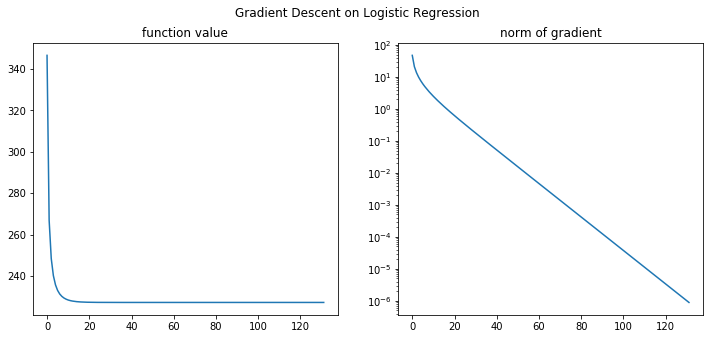

In [196]:
plt.show()

### Apply Newton's solver

In [197]:
x0_lgt_nt = np.zeros(n_lgt)
x_lgt_nt, obj_his_lgt_nt, err_his_lgt_nt, exit_flag_lgt_nt = \
    optimizeWithNT(x0_lgt_nt, lgt_func, lgt_grad, lgt_hess)

In [198]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_nt)
ax[1].set_title('norm of gradient')
fig.suptitle('Newton\'s Method on Logistic Regression')

Text(0.5,0.98,"Newton's Method on Logistic Regression")

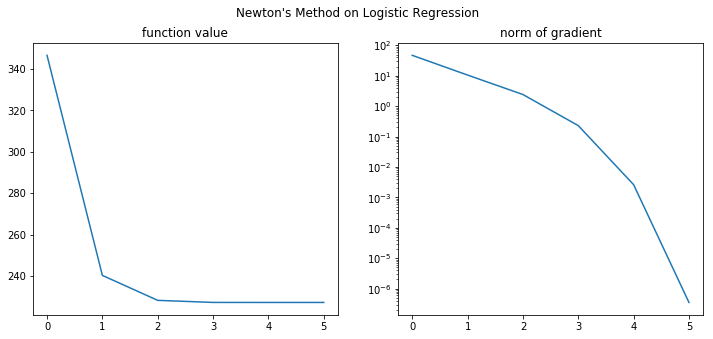

In [199]:
plt.show()

The plot for the report (it was asked to put both graphs to the same plot)

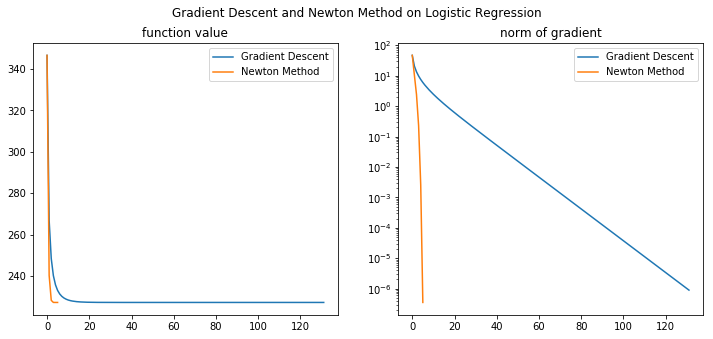

In [200]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_gd, label="Gradient Descent")
ax[0].plot(obj_his_lgt_nt, label="Newton Method")
ax[0].legend()
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_gd, label="Gradient Descent")
ax[1].semilogy(err_his_lgt_nt, label="Newton Method")
ax[1].legend()
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent and Newton Method on Logistic Regression')
plt.show()

## Poisson Regression

Recall the logistic regression model from the class,
$$
f(x)=\sum_{i=1}^m\left[\exp(\langle a_i,x\rangle)-b_i\langle a_i,x\rangle\right]+\frac{\lambda}{2}\|x\|^2
$$

Calculate the gradient and Hessian of the function and define them below using the given data.

In [201]:
# fix the random seed to generate same data set
np.random.seed(123)
# set dimension and create the data
m_psn = 500
n_psn = 50
A_psn = 0.3*np.random.randn(m_psn, n_psn)
x_psn = np.random.randn(n_psn)
b_psn = samplePSN(x_psn, A_psn)
lam_psn = 0.1

### Define functions

In [202]:
# define function, gradient and Hessian
def psn_func(x):
    return np.exp(A_psn.dot(x)).sum() - b_psn.T.dot(A_psn.dot(x)) + lam_psn/2*x.dot(x)
#
def psn_grad(x):
    return A_psn.T.dot(np.exp(A_psn.dot(x)) - b_psn) + lam_psn*x
#
def psn_hess(x):
    return A_psn.T.dot(np.diag(np.exp(A_psn.dot(x))).dot(A_psn)) + lam_psn*np.eye(len(x))

In [203]:
# uniform step size for gradient descent or should we use line search?
#####
# TODO: if there is a uniform stepsize, set up step_size_lgt = 
# otherwise set use_line_search=True <-- 
#####

### Apply gradient descent solver

In [204]:
x0_psn_gd = np.zeros(n_lgt)
x_psn_gd, obj_his_psn_gd, err_his_psn_gd, exit_flag_psn_gd = \
    optimizeWithGD(x0_psn_gd, psn_func, psn_grad, None, use_line_search=True)

In [205]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_psn_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_gd)
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent on Poisson Regression')

Text(0.5,0.98,'Gradient Descent on Poisson Regression')

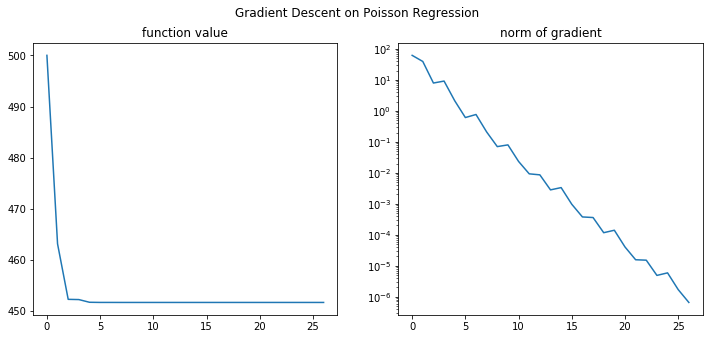

In [122]:
plt.show()

### Apply Newton's solver

In [123]:
x0_psn_nt = np.zeros(n_lgt)
x_psn_nt, obj_his_psn_nt, err_his_psn_nt, exit_flag_psn_nt = \
    optimizeWithNT(x0_psn_nt, psn_func, psn_grad, psn_hess)

In [124]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_psn_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_nt)
ax[1].set_title('norm of gradient')
fig.suptitle('Newton\'s Method on Poisson Regression')

Text(0.5,0.98,"Newton's Method on Poisson Regression")

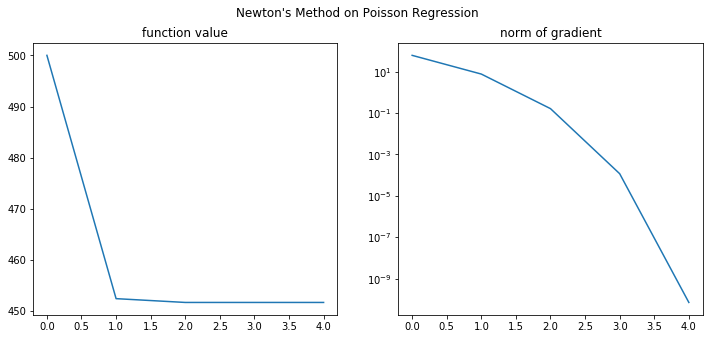

In [125]:
plt.show()

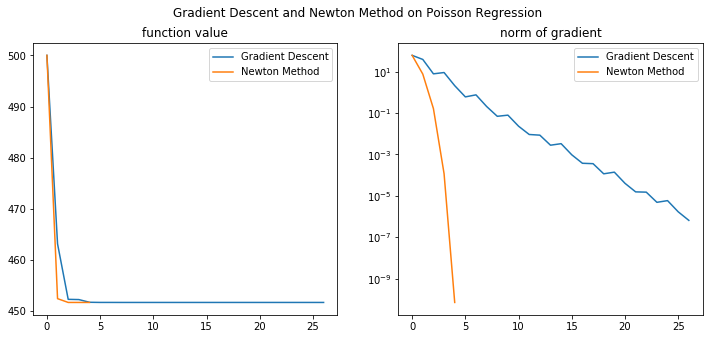

In [132]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_psn_gd, label="Gradient Descent")
ax[0].plot(obj_his_psn_nt, label="Newton Method")
ax[0].legend()
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_gd, label="Gradient Descent")
ax[1].semilogy(err_his_psn_nt, label="Newton Method")
ax[1].legend()
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent and Newton Method on Poisson Regression')
plt.show()